# Tight-binding models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dehe1011/QuantumDNA/blob/main/docs/tutorials/0_TB_Models.ipynb)

This notebook demonstrates how to utilize predefined tight-binding models and create custom models and parameters. It includes visualizing the Hamiltonian matrix derived from the selected model and performing a Fourier analysis on it.

In [1]:
# %pip install qDNA
# from qDNA import ROOT_DIR

# This can be used alternatively if you cloned the GitHub repository
import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('QuantumDNA')]+ 'QuantumDNA'
os.chdir(ROOT_DIR)

# Predefined tight-binding model

In [2]:
from qDNA import DNA_Seq, TB_MODELS_PROPS
from qDNA.model import TB_Model, TB_Ham
from qDNA.tools import get_config

In this chapter we want to use predefined tight-binding models. All we have to provide as an input is the upper strand of the DNA sequence and the name of the predefined tight-binding model. We show all available predefined models with their properties.

In [3]:
# input 
upper_strand = 'GCG'
tb_model_name = 'ELM'

print(TB_MODELS_PROPS)

{'WM': {'backbone': False, 'double_stranded': False, 'num_strands': 1, 'diagonal_hopping': False}, 'LM': {'backbone': False, 'double_stranded': True, 'num_strands': 2, 'diagonal_hopping': False}, 'ELM': {'backbone': False, 'double_stranded': True, 'num_strands': 2, 'diagonal_hopping': True}, 'FWM': {'backbone': True, 'double_stranded': False, 'num_strands': 3, 'diagonal_hopping': False}, 'FLM': {'backbone': True, 'double_stranded': True, 'num_strands': 4, 'diagonal_hopping': False}, 'FELM': {'backbone': True, 'double_stranded': True, 'num_strands': 4, 'diagonal_hopping': True}, 'FC': {'backbone': True, 'double_stranded': True, 'num_strands': 4, 'diagonal_hopping': True}}


First we define an instance of DNA_Seq and print all its attributes.

In [4]:
dna_seq = DNA_Seq(upper_strand, tb_model_name)
# print all attributes of the DNA_Seq instance
dna_seq.__vars__()

{'upper_strand': 'GCG',
 'lower_strand': 'CGC',
 'methylated': True,
 'tb_model_name': 'ELM',
 'tb_model_props': {'backbone': False,
  'double_stranded': True,
  'num_strands': 2,
  'diagonal_hopping': True},
 'backbone': False,
 'double_stranded': True,
 'num_strands': 2,
 'num_sites_per_strand': 3,
 'tb_dims': (2, 3),
 'complementary_base_dict': {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G', 'c': 'G'},
 'dna_seq': ('GCG', 'CGC')}

Then we create an instance of TB_Model and again print all its attributes. 

In [5]:
tb_model = TB_Model(dna_seq.tb_model_name, dna_seq.tb_dims)
# print all attributes of the TB_Model instance
tb_model.__vars__()

{'verbose': False,
 'tb_model_name': 'ELM',
 'tb_dims': (2, 3),
 'num_strands': 2,
 'num_sites_per_strand': 3,
 'num_sites': 6,
 'tb_model_props': {'backbone': False,
  'double_stranded': True,
  'num_strands': 2,
  'diagonal_hopping': True},
 'tb_config': [('E', '(0, 0)', '(0, 0)'),
  ('E', '(0, 1)', '(0, 1)'),
  ('E', '(0, 2)', '(0, 2)'),
  ('t', '(0, 1)', '(0, 0)'),
  ('t', '(0, 2)', '(0, 1)'),
  ('E', '(1, 0)', '(1, 0)'),
  ('E', '(1, 1)', '(1, 1)'),
  ('E', '(1, 2)', '(1, 2)'),
  ('t', '(1, 0)', '(1, 1)'),
  ('t', '(1, 1)', '(1, 2)'),
  ('h', '(0, 0)', '(1, 0)'),
  ('h', '(0, 1)', '(1, 1)'),
  ('h', '(0, 2)', '(1, 2)'),
  ('r+', '(0, 0)', '(1, 1)'),
  ('r+', '(0, 1)', '(1, 2)'),
  ('r-', '(0, 1)', '(1, 0)'),
  ('r-', '(0, 2)', '(1, 1)')],
 'tb_basis': ['(0, 0)', '(0, 1)', '(0, 2)', '(1, 0)', '(1, 1)', '(1, 2)'],
 'eh_basis': [('(0, 0)', '(0, 0)'),
  ('(0, 0)', '(0, 1)'),
  ('(0, 0)', '(0, 2)'),
  ('(0, 0)', '(1, 0)'),
  ('(0, 0)', '(1, 1)'),
  ('(0, 0)', '(1, 2)'),
  ('(0, 1)', '(

To create the tight-binding Hamiltonian from the tight-binding model that we just defined, we can first specify some keywords. We print the default values. 

In [6]:
# define the keyword arguments for the tight-binding hamiltonian
ham_kwargs = dict()

# default keywords: 
get_config()['ham_kwargs_default']

{'source': 'Hawke2010',
 'description': '2P',
 'particles': ['electron', 'hole', 'exciton'],
 'unit': 'rad/ps',
 'interaction_param': 0.0,
 'relaxation': True,
 'nn_cutoff': True}

We create an instance of TB_Ham and again print all its attributes

In [7]:
tb_ham = TB_Ham(dna_seq, **ham_kwargs)
# print all attributes of the TB_Ham instance
tb_ham.__vars__()

{'ham_kwargs': {'source': 'Hawke2010',
  'description': '2P',
  'particles': ['electron', 'hole', 'exciton'],
  'unit': 'rad/ps',
  'interaction_param': 0.0,
  'relaxation': True,
  'nn_cutoff': True},
 'verbose': False,
 'dna_seq': DNA_Seq(GCG, ELM, methylated=True),
 'tb_model': TB_Model(ELM, (2, 3)),
 'tb_basis': ['(0, 0)', '(0, 1)', '(0, 2)', '(1, 0)', '(1, 1)', '(1, 2)'],
 'tb_sites_flattened': ['G', 'C', 'G', 'C', 'G', 'C'],
 'tb_basis_sites_dict': {'(0, 0)': 'G',
  '(0, 1)': 'C',
  '(0, 2)': 'G',
  '(1, 0)': 'C',
  '(1, 1)': 'G',
  '(1, 2)': 'C'},
 'tb_sites': array([['G', 'C', 'G'],
        ['C', 'G', 'C']], dtype='<U1'),
 'description': '2P',
 '_particles': ['electron', 'hole', 'exciton'],
 '_source': 'Hawke2010',
 '_unit': 'rad/ps',
 'tb_params_electron': {'E_A': -6684.776770665955,
  'E_T': -7444.4104946052685,
  'E_G': -6836.703515453818,
  'E_C': -6532.850025878092,
  't_AA': 24.308279166058018,
  't_AT': 10.634872135150385,
  't_AG': 1.519267447878626,
  't_AC': -4.557802

Finally we can return the Hamiltonian matrix that determines the unitary evolution of the charge/ exciton dynamics on the selected DNA sequence. 

In [8]:
tb_ham.matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.89908431e+04,  1.21541396e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.21541396e+02, -2.02062571e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.99024036e+04,  1.21541396e+02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.21541396e+02, -1.86869896e+04, -1.51926745e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.51926745e+00, -1.99024036e+04]])

The TB_Ham class has an method that performs the Fourier analysis on the Hamiltonian and returns the average population, amplitude and frequency of a DNA base given a certain initial state

In [9]:
# Initial state 
init_state = tb_model.eh_basis[0]
# DNA base for which the Fourier components are calculated
end_state = tb_model.tb_basis[0]

# Average population of the chosen base 
tb_ham.get_fourier(init_state, end_state, ['average_pop'])

({},
 {},
 {'electron': 0.46006927979479517,
  'hole': 0.979822728019389,
  'exciton': 0.4507863368064506})

In [10]:
# Amplitudes and Frequencies on the chosen base 
tb_ham.get_fourier(init_state, end_state, ['amplitude', 'frequency'])

({'electron': [4.728431918319125e-06,
   2.7282595685398797e-07,
   1.6178248980930315e-05,
   9.632028769993153e-07,
   8.331331683047583e-06,
   4.807097950334152e-07,
   4.960217051858169e-07,
   2.861997352921931e-08,
   1.5923111301711996e-07,
   1.3826967981292828e-07,
   8.199943135841902e-08,
   7.120489773539868e-08,
   4.731288027052192e-09,
   4.108453857973733e-09,
   8.732244200938439e-07,
   4.496853946370264e-07,
   2.5946413143960835e-08,
   3.727259413778123e-08,
   6.567300741825676e-08,
   3.909967621436749e-09,
   0.0014165725822459238,
   0.002495951351233831,
   0.0001486012191567198,
   3.288906115533982e-07,
   5.794937559882878e-07,
   3.450126485472695e-08,
   6.463731692285722e-10,
   5.612835924769222e-10,
   3.544714504384122e-09,
   2.4565891658827312e-05,
   2.1331999190357593e-05,
   0.00013471950356516816,
   5.7035489972730795e-09,
   4.952724870794498e-09,
   3.127829838807895e-08,
   1.4049750012901268e-07,
   8.331331683011125e-06,
   4.960217051777

It is easier to visualize the amplitudes and frequencies of the Fourier decomposition.

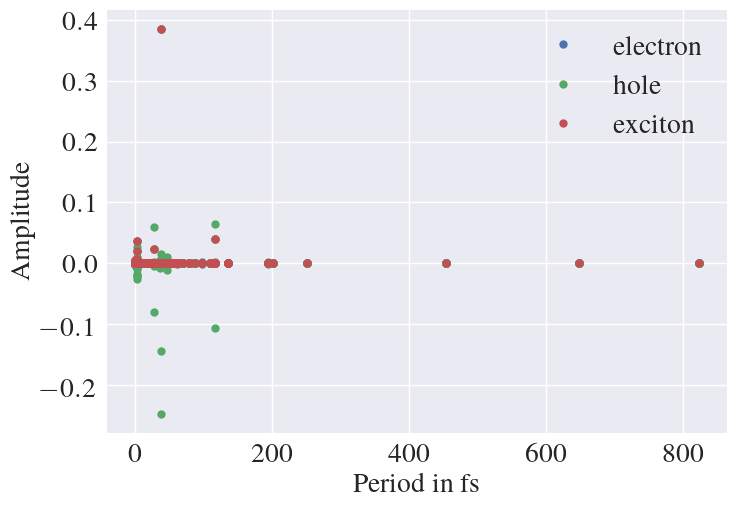

In [11]:
import matplotlib.pyplot as plt
from qDNA.plotting import plot_fourier

fig, ax = plt.subplots()
plot_fourier(ax, tb_ham, init_state, end_state, 'Period')

# Custom tight-binding model

In [12]:
from qDNA.model import Custom_TB_Model, save_tb_params, load_tb_params, tb_ham_1P

1. Create a tight-binding model describing hierarchical relations between persons (tree-shaped)

In [13]:
# input 
tb_model_name = 'my_model'
num_strands = 1
tb_basis = ['P0', 'P1', 'P2', 'P3']
tb_config = [('relation', 'P0', 'P1'),
             ('relation', 'P0', 'P2'), 
             ('relation', 'P0', 'P3')]

tb_dims = ( num_strands, len(tb_basis)//num_strands )
tb_model = Custom_TB_Model(tb_model_name, tb_dims, tb_basis, tb_config)

2. Specify the persons and rate their relations with a number

In [14]:
tb_sites = ['Alice', 'Bob', 'Charlie', 'Eve']
tb_param_dict = {'relation_AliceBob': 5, 'relation_AliceCharlie': 3, 'relation_AliceEve': -2,
            'relation_BobAlice': 5, 'relation_CharlieAlice': 3, 'relation_EveAlice': -2}
info_dict={'author': 'Herb2024', 'subject': 'relations_between_persons'}

3. Save and load the created dictionary to be able to reuse and look up the parameters later

In [15]:
save_tb_params(tb_param_dict, info_dict, directory = 'data/raw/test_params', notes = 'The parameters describe relations between persons.')
tb_param_dict = load_tb_params(info_dict, directory = 'data/raw/test_params', load_metadata = False)

4. Create the corresponding matrix

In [16]:
tb_ham_matrix = tb_ham_1P(tb_model, tb_param_dict, dict(zip(tb_basis, tb_sites)) )
tb_ham_matrix

array([[ 0.,  5.,  3., -2.],
       [ 5.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.]])

# Analysis of the custom tight-binding model

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from qDNA.tools import save_figure
from qDNA.utils import calc_average_pop, calc_amplitudes, calc_frequencies, get_pop_fourier
from qDNA.plotting import get_frame_fourier

As an example we plot the Fourier analysis of the Hamiltonian. As expected there is one dominant timescale.

Average population: 0.4999999999999998


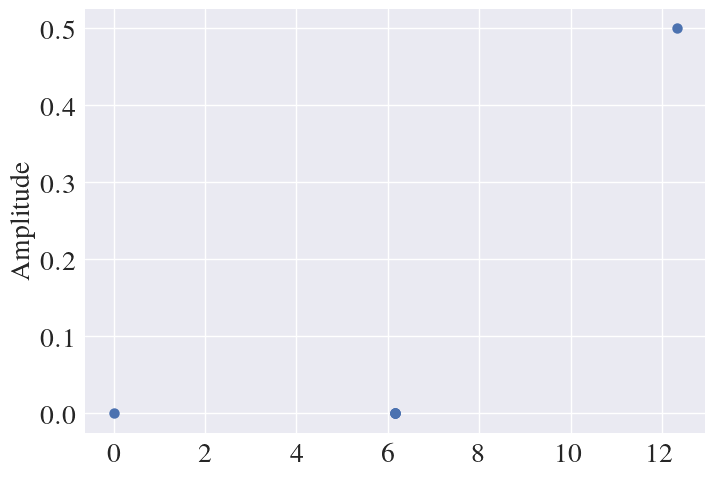

In [18]:
eigv, eigs = np.linalg.eigh(tb_ham_matrix)
amplitudes = calc_amplitudes(eigs, 0, 0)
frequencies = calc_frequencies(eigv)
average_pop = calc_average_pop(eigs, 0, 0)
fig, ax = plt.subplots()
get_frame_fourier(ax, x_axis='frequencies')
ax.plot(frequencies, amplitudes, '.', markersize = 15)
save_figure(fig, 'test_fourier', 'data/figures/test_plots', format='pdf')
print(f'Average population: {average_pop}')
plt.show()

Plot of the population dynamics for Alice interacting with her colleagues

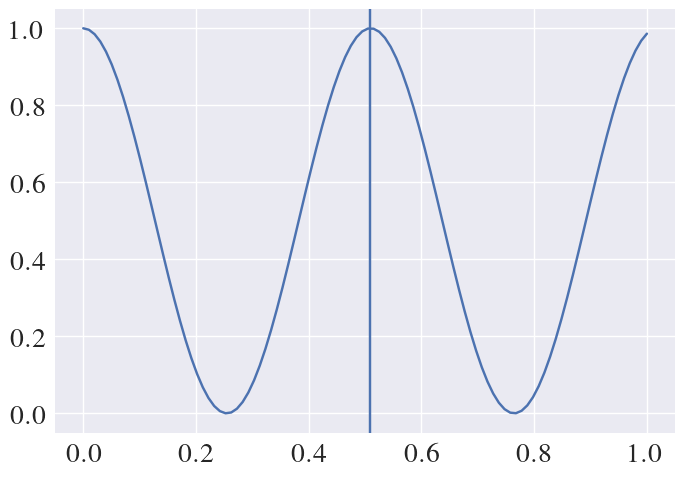

In [19]:
# The vertical line is calculated as $2*np.pi/frequency$

times = np.linspace(0,1,100)
pop_list = [get_pop_fourier(t, average_pop, amplitudes, frequencies) for t in times]
plt.plot(times, pop_list)
plt.axvline(x=0.5096)
plt.show()